# TP4 -  Ant System and Traveling SalesmanProblem for the Traveling Salesman Problem

### Author: Petter Stahle (*petter.stahle@etu.unige.ch*)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import process_time
from sklearn.metrics import pairwise_distances

from tsp import *

%matplotlib inline
%load_ext autoreload
%autoreload 2
np.set_printoptions(precision=3)
plt.style.use(['science', 'notebook', 'grid'])

# Data

Here we define a an example instance of the data for the problem.

## Load data from task definiton file

(18, 2)
(49, 2)


(210.8515, 211.6985, -48.39, -47.949999999999996)

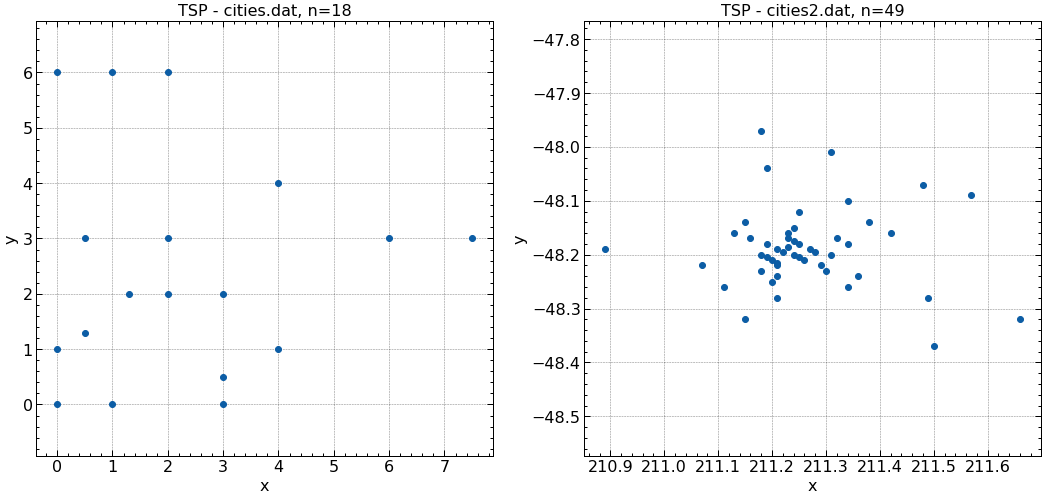

In [3]:
# Load city coordinates
plt.figure(figsize=(18,8))

plt.subplot(121)
filename = 'cities.dat'
coords_dict = read_data(filename)
cities, coords = extract_coords(coords_dict)
print(coords.shape)
plt.scatter(coords[:,0], coords[:,1])
plt.title(f'TSP - {filename}, n={len(cities)}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

plt.subplot(122)
filename = 'cities2.dat'
coords_dict = read_data(filename)
cities, coords = extract_coords(coords_dict)
print(coords.shape)
plt.scatter(coords[:,0], coords[:,1])
plt.title(f'TSP - {filename}, n={len(cities)}')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')

## Generate TSP Circle problem for testing

/home/exotic_ninja/tmp_projects/mo_tp4/tsp.py:183: RuntimeWarning: divide by zero encountered in true_divide
  tao = np.full((self.n, self.n), tao_0) # pheromone associated with edge (i,j)


  0%|          | 0/100 [00:00<?, ?it/s]

Length:  35.21318203839597
Path:  ['c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9', 'c10', 'c11', 'c12', 'c13', 'c14', 'c15', 'c16', 'c17', 'c18', 'c19', 'c20', 'c1', 'c2']


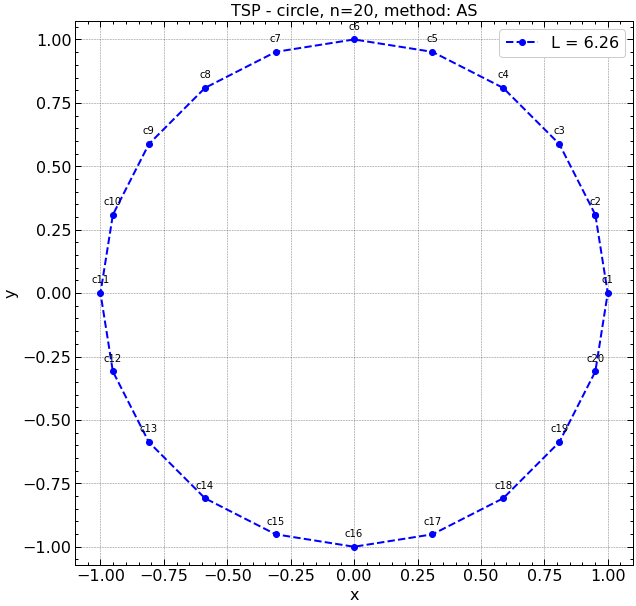

In [32]:
n = 20
cities, coords = generate_TSP(n)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

ants = AntSystem(TSP)
config, length = ants.search(10, 100, tao_0=1/7)

print('Length: ', energy)
# Convert permutation into list of cities
path = [cities[c] for c in config]
print('Path: ', path)

# PLOT
path_coords = np.array([coords[c] for c in config])
plt.figure(figsize=(10,10))
plt.plot(path_coords[:,0], path_coords[:,1], 'bo--', label=rf'L = {length:.2f}')
plt.title(f'TSP - circle, n={n}, method: AS')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        path[i], # this is the text
        (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

# 1 - Run AS on .dat files

## Cities.dat

### Run Greedy TSP 10 times for the average length $L_{nn}$

L_nn =  31.677927451560628


/home/exotic_ninja/tmp_projects/mo_tp4/tsp.py:183: RuntimeWarning: divide by zero encountered in true_divide
  tao = np.full((self.n, self.n), tao_0) # pheromone associated with edge (i,j)


  0%|          | 0/100 [00:00<?, ?it/s]

Length:  32.95926888787213
Path:  ['g', 'p', 'm', 'i', 'f', 'h', 'c', 'a', 'b', 'n', 'j', 'd', 'q', 'l', 'e', 'r', 'k', 'o', 'g']


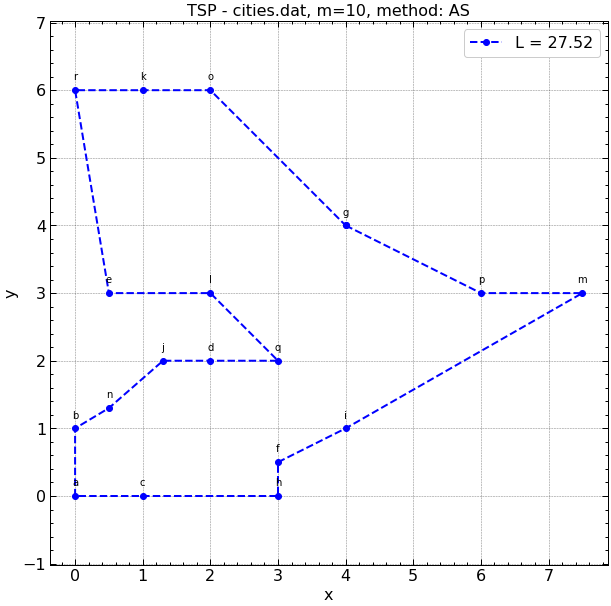

In [39]:
filename = 'cities.dat'
coords_dict = read_data('data/'+filename)
cities, coords = extract_coords(coords_dict)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

GS_energy = []
GS_sols = []
for i in range(10):
    config, energy = GreedySearch(TSP).search()
    GS_energy.append(energy)
    GS_sols.append(config)

Lnn = np.mean(GS_energy)
print('L_nn = ', Lnn)

tao_0 = 1/Lnn

ants = AntSystem(TSP)
config, length = ants.search(10, 100, tao_0=tao_0)

print('Length: ', energy)
# Convert permutation into list of cities
path = [cities[c] for c in config]
print('Path: ', path)

# PLOT
path_coords = np.array([coords[c] for c in config])
plt.figure(figsize=(10,10))
plt.plot(path_coords[:,0], path_coords[:,1], 'bo--', label=rf'L = {length:.2f}')
plt.title(f'TSP - {filename}, m=10, method: AS')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        path[i], # this is the text
        (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

## cities2.dat

L_nn =  3.339970053901427


/home/exotic_ninja/tmp_projects/mo_tp4/tsp.py:183: RuntimeWarning: divide by zero encountered in true_divide
  tao = np.full((self.n, self.n), tao_0) # pheromone associated with edge (i,j)


  0%|          | 0/100 [00:00<?, ?it/s]

Length:  3.2734864074716157
Path:  ['c43', 'c35', 'c11', 'c08', 'c14', 'c18', 'c23', 'c25', 'c21', 'c17', 'c19', 'c24', 'c26', 'c37', 'c39', 'c29', 'c16', 'c20', 'c09', 'c13', 'c04', 'c05', 'c46', 'c49', 'c48', 'c44', 'c41', 'c33', 'c31', 'c28', 'c32', 'c34', 'c36', 'c40', 'c42', 'c38', 'c27', 'c30', 'c15', 'c12', 'c10', 'c07', 'c06', 'c02', 'c03', 'c01', 'c22', 'c47', 'c45', 'c43']


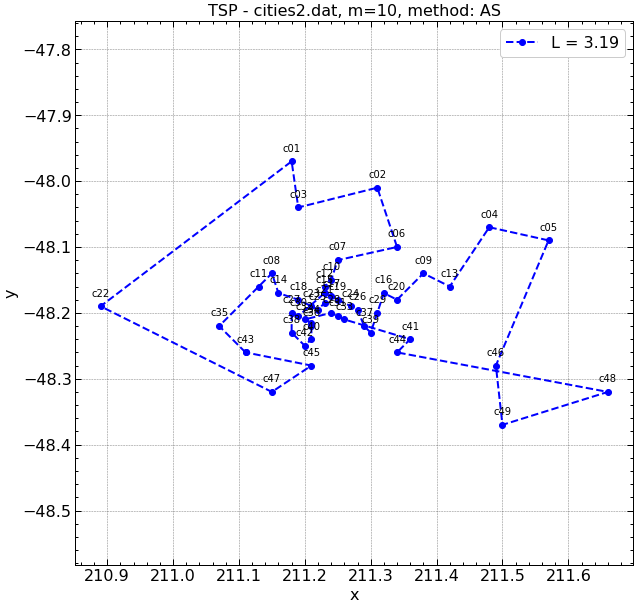

In [41]:
filename = 'cities2.dat'
coords_dict = read_data('data/'+filename)
cities, coords = extract_coords(coords_dict)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

GS_energy = []
GS_sols = []
for i in range(10):
    config, energy = GreedySearch(TSP).search()
    GS_energy.append(energy)
    GS_sols.append(config)

Lnn = np.mean(GS_energy)
print('L_nn = ', Lnn)

tao_0 = 1/Lnn

ants = AntSystem(TSP)
config, length = ants.search(10, 100, tao_0=tao_0)

print('Length: ', energy)
# Convert permutation into list of cities
path = [cities[c] for c in config]
print('Path: ', path)

# PLOT
path_coords = np.array([coords[c] for c in config])
plt.figure(figsize=(10,10))
plt.plot(path_coords[:,0], path_coords[:,1], 'bo--', label=rf'L = {length:.2f}')
plt.title(f'TSP - {filename}, m=10, method: AS')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        path[i], # this is the text
        (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

# 2 - Analyse influence of $m$ and $t_{max}$

### $m \in [1, 5, 10, 20, 50], \ t_{max} \in [50, 100, 200, 500]$

In [65]:
M = [1, 5, 10, 15, 20, 30]
T = [50, 100, 200, 500]
L = [[[] for _ in T], [[] for _ in T]]

for filename, Lnn, lengths in zip(['cities.dat', 'cities2.dat'], [33, 3.4], L):
    coords_dict = read_data('data/'+filename)
    cities, coords = extract_coords(coords_dict)
    TSP = {
        'cities': cities,
        'coords': coords,
        'round_path': True
    }

    print()
    print('File: ', filename)
    print()

    for i, t in tqdm(enumerate(T)):
        for m in M:
            ants = AntSystem(TSP)
            config, length = ants.search(n_ants=m, max_t=t, tao_0=1/Lnn)

            print(f'm: {m}, L: {length:.2f}')
            lengths[i].append(length)


File:  cities.dat



0it [00:00, ?it/s]

m: 1, L: 37.10
m: 5, L: 31.05
m: 10, L: 27.52
m: 15, L: 27.52
m: 20, L: 27.52
m: 30, L: 27.52
m: 1, L: 31.95
m: 5, L: 29.16
m: 10, L: 27.52
m: 15, L: 28.09
m: 20, L: 28.67
m: 30, L: 27.52
m: 1, L: 35.97
m: 5, L: 29.51
m: 10, L: 29.16
m: 15, L: 27.52
m: 20, L: 27.52
m: 30, L: 28.78
m: 1, L: 27.52
m: 5, L: 30.57
m: 10, L: 27.52
m: 15, L: 27.52
m: 20, L: 27.52
m: 30, L: 27.52

File:  cities2.dat



0it [00:00, ?it/s]

m: 1, L: 3.42
m: 5, L: 3.28
m: 10, L: 3.07
m: 15, L: 3.09
m: 20, L: 2.90
m: 30, L: 3.06
m: 1, L: 3.53
m: 5, L: 3.19
m: 10, L: 2.98
m: 15, L: 3.02
m: 20, L: 3.15
m: 30, L: 2.98
m: 1, L: 3.22
m: 5, L: 3.20
m: 10, L: 3.01
m: 15, L: 3.04
m: 20, L: 2.93
m: 30, L: 3.07
m: 1, L: 3.40
m: 5, L: 3.23
m: 10, L: 2.92
m: 15, L: 3.16
m: 20, L: 2.95
m: 30, L: 3.01


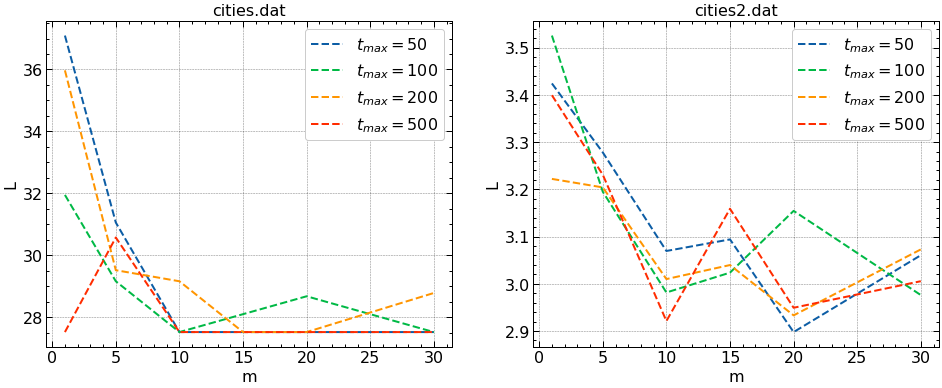

In [66]:
fig, ax = plt.subplots(1, 2, figsize=(16,6))
for i, t in enumerate(T):
    ax[0].plot(M, L[0][i], '--', label=fr'$t_{{max}}={t}$')
ax[0].set_ylabel('L')
ax[0].set_title('cities.dat')
ax[0].set_xlabel('m')
ax[0].legend()

for i, t in enumerate(T):
    ax[1].plot(M, L[1][i], '--', label=fr'$t_{{max}}={t}$')
ax[1].set_ylabel('L')
ax[1].set_title('cities2.dat')
ax[1].set_xlabel('m')
ax[1].legend()

# Comparison with Greedy search

### Method:
* Average over 10 runs for Greedy search
* Ant System optimal parameters: $m=20, \ t_{max}=200$


File:  cities.dat
Greedy search
Mean length: 33.48
Best: 31.69

Ant System
length: 27.52

File:  cities2.dat
Greedy search
Mean length: 3.41
Best: 3.15

Ant System
length: 2.80


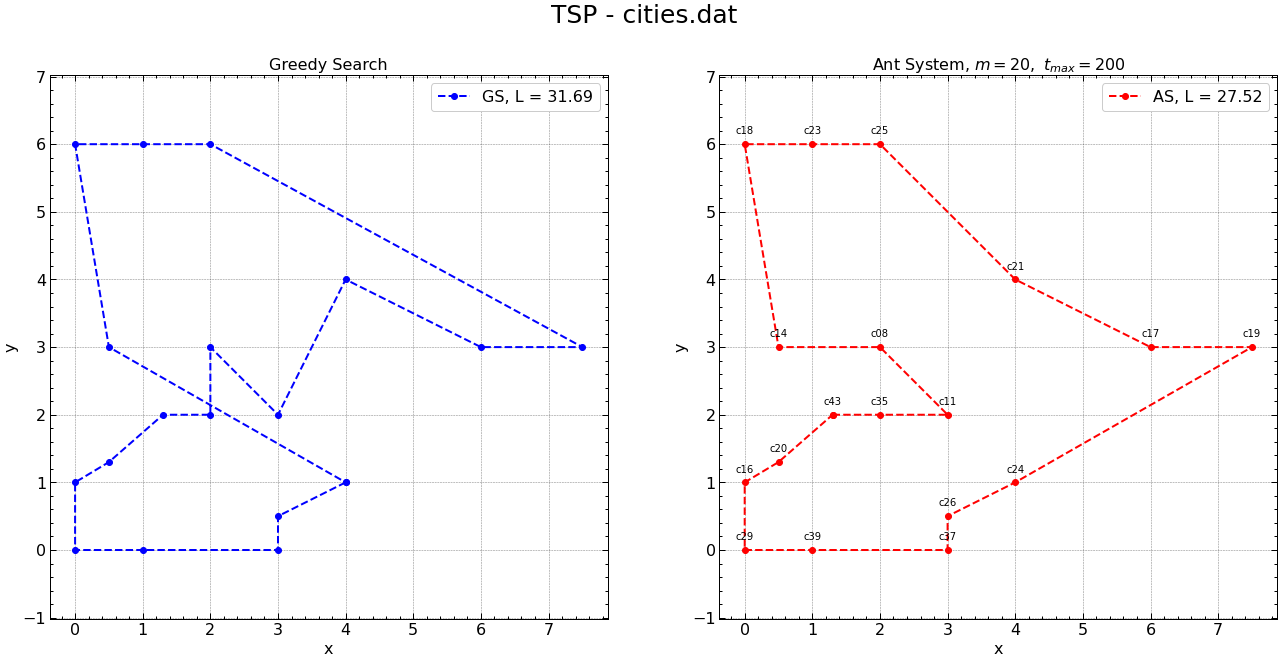

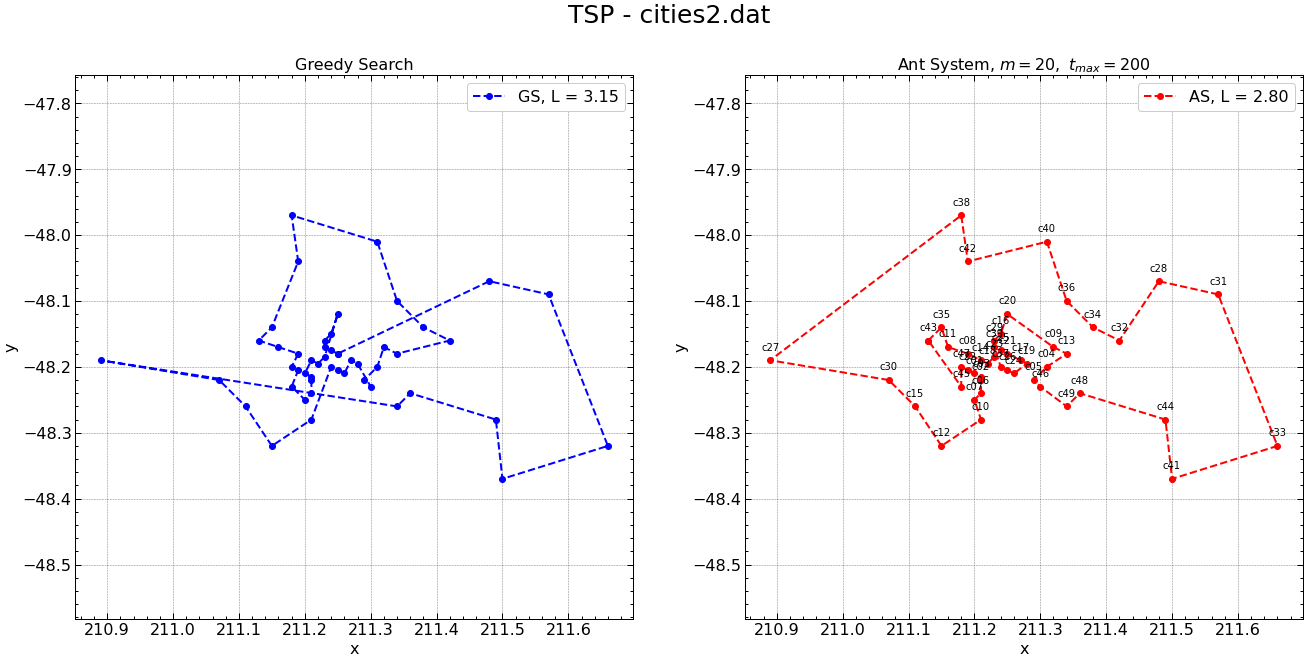

In [81]:
m = 20
tmax = 200


for i, (filename, Lnn) in enumerate(zip(['cities.dat', 'cities2.dat'], [33, 3.4])):
    plt.figure(figsize=(22,10))
    plt.suptitle(f'TSP - {filename}', fontsize=25)
    print()
    print('File: ', filename)

    plt.subplot(121)
    plt.title(f'Greedy Search')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')
    
    coords_dict = read_data('data/'+filename)
    cities, coords = extract_coords(coords_dict)
    TSP = {
        'cities': cities,
        'coords': coords,
        'round_path': True
    }

    print('Greedy search')
    P = []
    L = []
    for _ in range(10):
        config, energy = GreedySearch(TSP).search()
        L.append(energy)
        P.append(config)
    print(f'Mean length: {np.mean(L):.2f}')
    length_gs = np.min(L)
    config_gs = P[np.argmin(L)]
    print(f'Best: {np.min(L):.2f}')

    path_coords = np.array([coords[c] for c in config_gs])

    plt.plot(path_coords[:,0], path_coords[:,1], 'bo--', label=rf'GS, L = {length_gs:.2f}')
    plt.legend()


    plt.subplot(122)
    plt.title(fr'Ant System, $m={m},\ t_{{max}}={tmax}$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis('equal')

    print()
    print('Ant System')
    ants = AntSystem(TSP)
    config, length = ants.search(n_ants=m, max_t=tmax, tao_0=1/Lnn)
    print(f'length: {length:.2f}')
    path_coords = np.array([coords[c] for c in config])

    plt.plot(path_coords[:,0], path_coords[:,1], 'ro--', label=rf'AS, L = {length:.2f}')
    plt.legend()

    # Annotate cities
    for i in range(len(cities)):
        plt.annotate(
            path[i], # this is the text
            (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
            textcoords="offset points", # how to position the text
            xytext=(0,10), # distance from text to points (x,y)
            # backgroundcolor='aliceblue',
            # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
            ha='center' # horizontal alignment can be left, right or center
            )



# Test with uniformly distributed cities for $n = 50, 60, 80, 100$

Here we generate the TSP problem on a grid of size 10x10, with n samples uniformly distributed.

In [82]:
N = [50, 60, 80, 100]

AS_times = [[] for _ in N]
AS_energy = [[] for _ in N]
GS_energy = [[] for _ in N]
GS_times = [[] for _ in N]

for i, n in tqdm(enumerate(N)):
    for _ in tqdm(range(5)):
        cities, coords = generate_TSP(n, method='random')
        TSP = {
            'cities': cities,
            'coords': coords,
            'round_path': True
        }

        _, energy = GreedySearch(TSP).search()
        start = process_time()
        GS_energy[i].append(energy)
        GS_times[i].append(process_time()-start)

        start = process_time()
        _, energy = AntSystem(TSP).search(n_ants=m, max_t=tmax, tao_0=1/energy)
        AS_times[i].append(process_time()-start)
        AS_energy[i].append(energy)

0it [00:00, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [83]:
print(f'AS - m={m}, max_t={tmax}')
print('Energy')
print('Mean: ', np.mean(AS_energy))
print('Std: ', np.std(AS_energy))
print('Best: ', np.min(AS_energy))
print('Time')
print('Mean: ', np.mean(AS_times), ' s')
print('Std: ', np.std(AS_times))

print('GS')
print('Energy')
print('Mean: ', np.mean(GS_energy))
print('Std: ', np.std(GS_energy))
print('Min: ', np.min(GS_energy))
print('Time')
print('Mean: ', np.mean(GS_times), ' s')
print('Std: ', np.std(GS_times))

AS - m=20, max_t=200
Energy
Mean:  74.18453125939747
Std:  10.735265905514003
Best:  57.304999326758555
Time
Mean:  19.66208092000001  s
Std:  6.862500497476737
GS
Energy
Mean:  80.5610060728594
Std:  11.634970253417803
Min:  62.38754329330856
Time
Mean:  1.5490000015461193e-05  s
Std:  2.686242723730246e-06


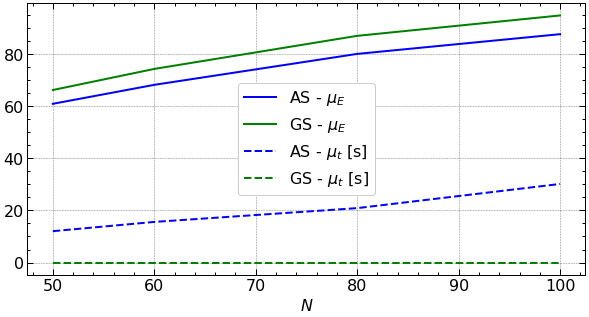

In [84]:
mean_AS_E = [np.mean(e) for e in AS_energy]
mean_AS_t = [np.mean(t) for t in AS_times]
mean_GS_E = [np.mean(e) for e in GS_energy]
mean_GS_t = [np.mean(t) for t in GS_times]

plt.figure(None, (10,5))
plt.plot(N, mean_AS_E, color='blue', label=r'AS - $\mu_E$')
plt.plot(N, mean_GS_E, color='green', label=r'GS - $\mu_E$')
plt.plot(N, mean_AS_t, '--', color='blue', label=r'AS - $\mu_t$ [s]')
plt.plot(N, mean_GS_t, '--', color='green', label=r'GS - $\mu_t$ [s]')

plt.xlabel(r'$N$')
plt.legend()

# Comparison of Ant System and Simulated Annealing

# Visualization of pheromone intensity

Length:  27.515362563425352
Path:  ['g', 'p', 'm', 'i', 'f', 'h', 'c', 'a', 'b', 'n', 'j', 'd', 'q', 'l', 'e', 'r', 'k', 'o', 'g']


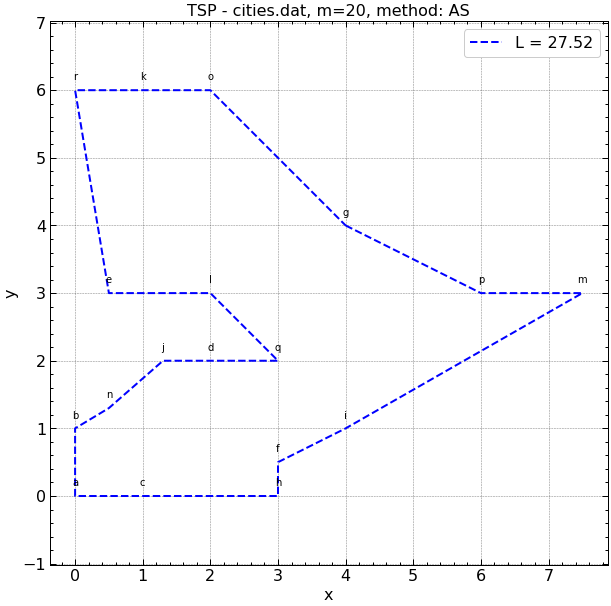

In [25]:
filename = 'cities.dat'
coords_dict = read_data('data/'+filename)
cities, coords = extract_coords(coords_dict)

TSP = {
    'cities': cities,
    'coords': coords,
    'round_path': True
}

ants = AntSystem(TSP)
config, length, intensities = ants.search(20, 100, tao_0=0.03, return_intensity=True)

print('Length: ', length)
# Convert permutation into list of cities
path = [cities[c] for c in config]
print('Path: ', path)

# PLOT
path_coords = np.array([coords[c] for c in config])
plt.figure(figsize=(10,10))
plt.plot(path_coords[:,0], path_coords[:,1], 'b--', label=rf'L = {length:.2f}')
plt.title(f'TSP - {filename}, m=20, method: AS')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.legend()

# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        path[i], # this is the text
        (path_coords[i,0], path_coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

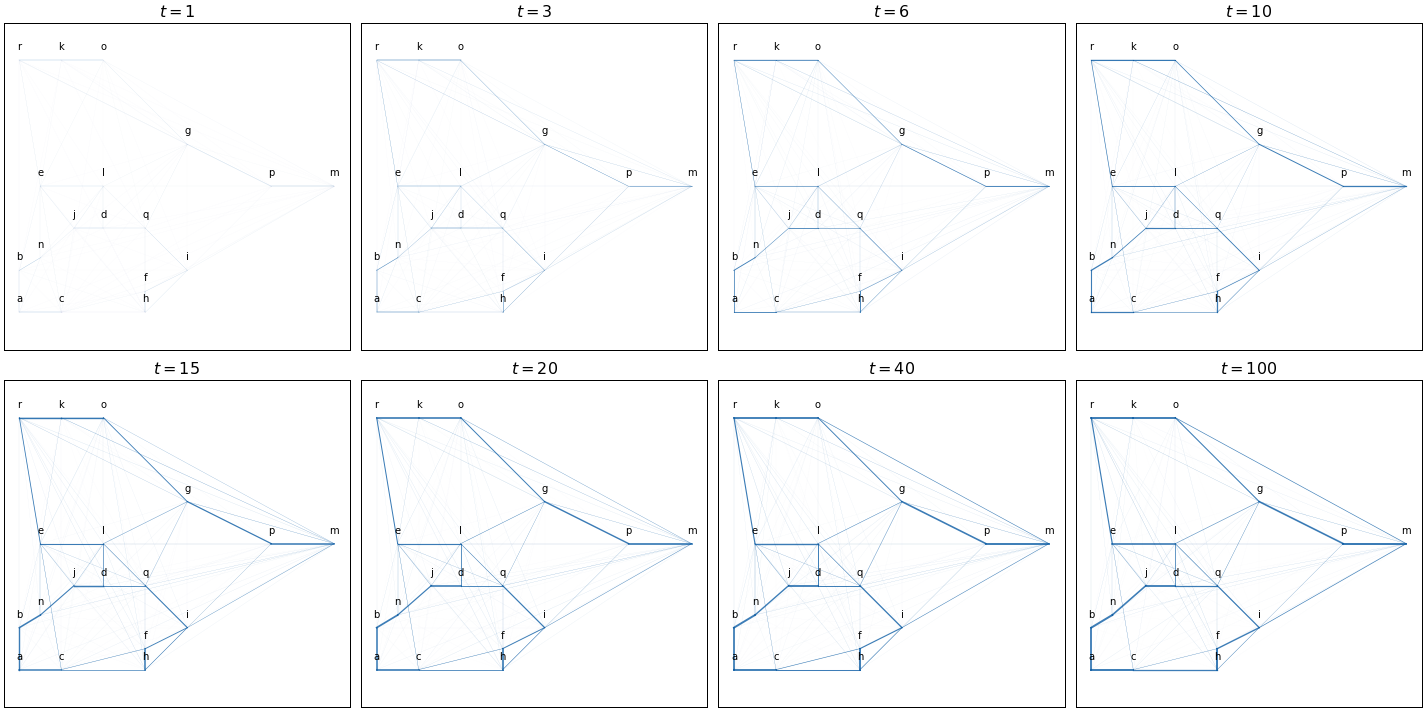

In [28]:
I = np.array(intensities)
W = I + np.transpose(I, [0,2,1])
W = W/np.max(W)

ind = np.triu_indices(W.shape[1], 1)
X = coords[:,0]
Y = coords[:,1]

plt.figure(figsize=(20,20))

for i, t in enumerate([1, 3, 6, 10, 15, 20, 40, 100]):

    plt.subplot(4, 4, i+1)
    plt.title(fr'$t = {t}$')
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            line = plt.Line2D((X[i], X[j]), (Y[i], Y[j]), lw=W[t,i,j]*2, alpha=0.8)
            plt.gca().add_line(line)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])



    # Annotate cities
    for i in range(len(cities)):
        plt.annotate(
            cities[i], # this is the text
            (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
            textcoords="offset points", # how to position the text
            xytext=(0,10), # distance from text to points (x,y)
            # backgroundcolor='aliceblue',
            # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
            ha='center' # horizontal alignment can be left, right or center
            )

plt.tight_layout()

### Trying to create animation for the pheromone evolution but not working.

In [21]:
from matplotlib.animation import FuncAnimation
from IPython import display

I = np.array(intensities)
W = I + np.transpose(I, [0,2,1])
W = W/np.max(W)

ind = np.triu_indices(W.shape[1], 1)
X = coords[:,0]
Y = coords[:,1]


fig = plt.figure(figsize=(8,8))
plt.xlim(-0.5, 8)
plt.axis('equal')
plt.xticks([])
plt.yticks([])
# Annotate cities
for i in range(len(cities)):
    plt.annotate(
        cities[i], # this is the text
        (coords[i,0], coords[i, 1]), # these are the coordinates to position the label
        textcoords="offset points", # how to position the text
        xytext=(0,10), # distance from text to points (x,y)
        # backgroundcolor='aliceblue',
        # fontsize= 'xx-large',  fontfamily='sans-serif',fontweight='bold',
        ha='center' # horizontal alignment can be left, right or center
        )

def animate(frame):
    t = frame
    plt.title(fr'$t = {t}$')
    for i in range(len(X)):
        for j in range(i+1, len(X)):
            line = plt.Line2D((X[i], X[j]), (Y[i], Y[j]), lw=W[t,i,j]*2, alpha=0.8, animated=True)
            plt.gca().add_line(line)

# for i, t in enumerate(range(W.shape[0])):
#     plt.clf()
#     plt.title(fr'$t = {t}$')
#     for i in range(len(X)):
#         for j in range(i+1, len(X)):
#             line = plt.Line2D((X[i], X[j]), (Y[i], Y[j]), lw=W[t,i,j]*2, alpha=0.8)
#             plt.gca().add_line(line)
# plt.pause(0.001)

print('anim...')
anim = FuncAnimation(fig, animate, frames=W.shape[0], interval=100, blit=False)
print('to video...')
video = anim.to_html5_video()
print('html...')
html = display.HTML(video)
display.display(html)
plt.close()


anim...
to video...
html...
